In [ ]:
# LEARNING CURVES

In [9]:
import json
import matplotlib.pyplot as plt

model_path = 'D:/PATENT/Model_testing/fibrosis_modified_model25.h5'
history_path = 'D:/PATENT/Model_testing/fibrosis_modified_history25.json'

# Load the training history
with open(history_path, 'r') as f:
    history = json.load(f)

In [10]:
# Extract metrics from history
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(accuracy) + 1)

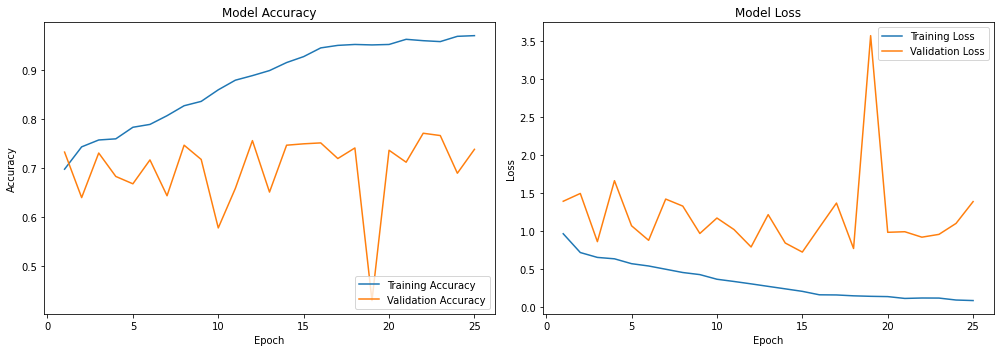

In [11]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

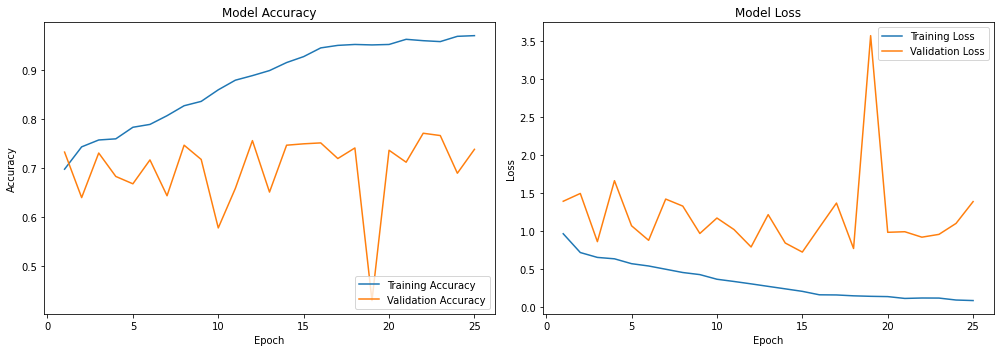

In [12]:
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()

# Save the plots
plt.savefig('D:/PATENT/learning_curves/ballooning25_modified_learning_curve.png')

plt.show()

In [5]:
# CONFUSION MATRIX (BINARY)

In [13]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the trained model
model = load_model(model_path)

test_dir= "D:/DATASET/CNN/ballooning/val"
batch_size = 32 

# Set up ImageDataGenerator for test data (use same preprocessing as during training)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),  # Adjust based on your model input size
    batch_size=batch_size,
    class_mode='binary',  # Use 'binary' for binary classification
    shuffle=False
)

# Get actual labels
y_true = test_generator.classes

# Get predicted labels
y_pred_proba = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
y_pred = (y_pred_proba > 0.5).astype('int').ravel()  # Convert probabilities to binary predictions

# 3. Evaluate model performance using confusion matrix and classification report
cm = confusion_matrix(y_true, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Absent (Class 0)', 'Present (Class 1)'])

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Fibrosis Model')
plt.savefig('D:/PATENT/Confusion_matrix/ballooning25_modified_Confusion_matrix.png')
plt.show()


# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Absent (Class 0)', 'Present (Class 1)']))

# 4. Visualize training history
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()

plt.show()


Found 27698 images belonging to 2 classes.


ValueError: Found input variables with inconsistent numbers of samples: [27698, 138490]

In [ ]:
# CONFUSION MATRIX (CATEGORICAL)

Found 5349 images belonging to 5 classes.


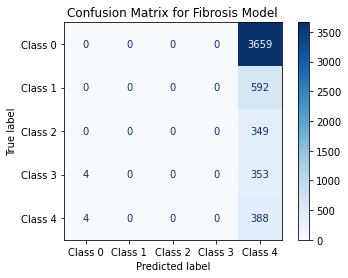

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00      3659
     Class 1       0.00      0.00      0.00       592
     Class 2       0.00      0.00      0.00       349
     Class 3       0.00      0.00      0.00       357
     Class 4       0.07      0.99      0.14       392

    accuracy                           0.07      5349
   macro avg       0.01      0.20      0.03      5349
weighted avg       0.01      0.07      0.01      5349



C:\Users\JUHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JUHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JUHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


FileNotFoundError: [Errno 2] No such file or directory: 'D:/PATENT/Model_testing/fibrosis_history.json'

In [14]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define model path
model_path = 'D:/PATENT/Model_testing/fibrosis_modified_model25.h5'

# Load the trained model
model = load_model(model_path)

# Define test data directory and batch size
test_dir = "D:/DATASET/CNN/fibrosis/val"
batch_size = 32

# Set up ImageDataGenerator for test data (use the same preprocessing as during training)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),  # Adjust based on your model input size
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=False
)

# Get actual labels
y_true = test_generator.classes

# Get predicted labels (probabilities)
y_pred_proba = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_proba, axis=1)

# Evaluate model performance using confusion matrix and classification report
cm = confusion_matrix(y_true, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Fibrosis Model')
plt.savefig('D:/PATENT/Confusion_matrix/fibrosis_model_confusion_matrix25.png')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']))




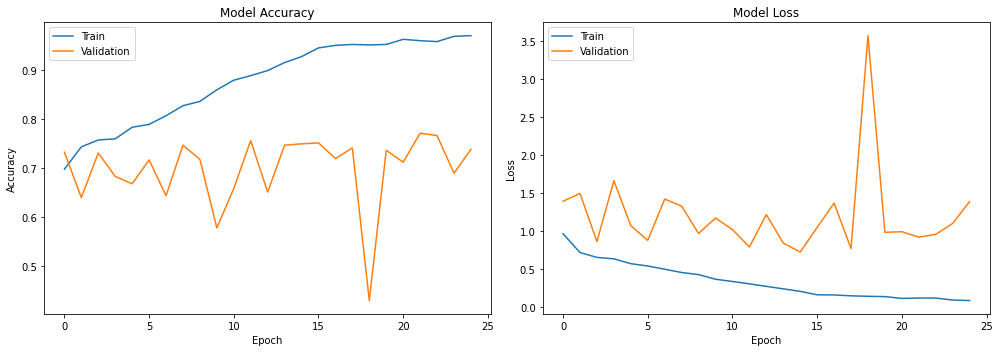

In [15]:
# Visualization of training history
# Load the training history
with open('D:/PATENT/Model_testing/fibrosis_modified_history25.json', 'r') as f:
    history = json.load(f)

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# ROC & AUC curves

In [16]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

plt.savefig('D:/PATENT/ROC/fibrosis25_ROC.png')
plt.show()

ValueError: multiclass format is not supported

In [ ]:
# Precision-Recall curves

In [8]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.savefig('D:/PATENT/Pre_Rec/ballooning25_Pre_Rec.png')
plt.show()


NameError: name 'y_scores' is not defined

In [ ]:
# Caliberation curve

In [ ]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=10)
plt.plot(prob_pred, prob_true)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')

plt.savefig('D:/PATENT/Calibration/ballooning25_Calibration.png')
plt.show()